## FLC Simulation for Line Follower Robot

c:\Users\fahri\miniconda3\envs\fuzzy\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


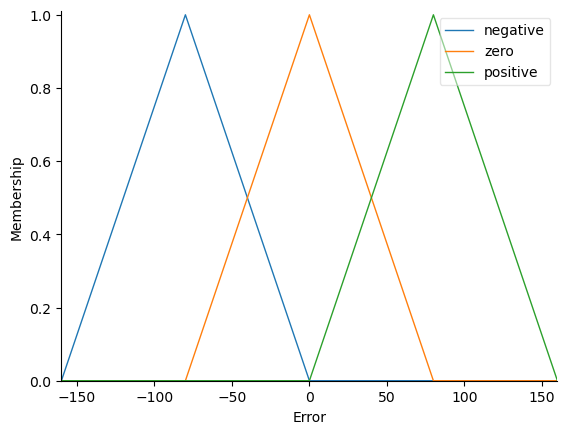

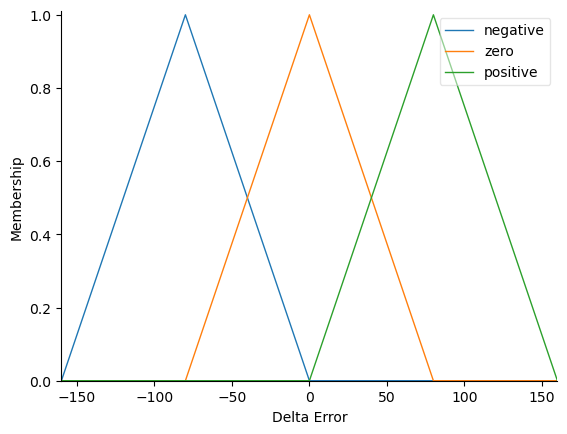

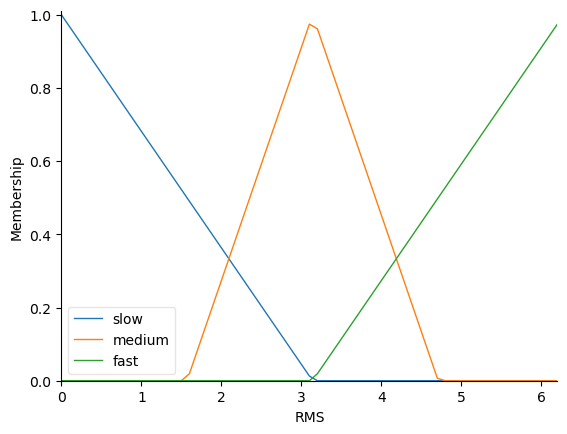

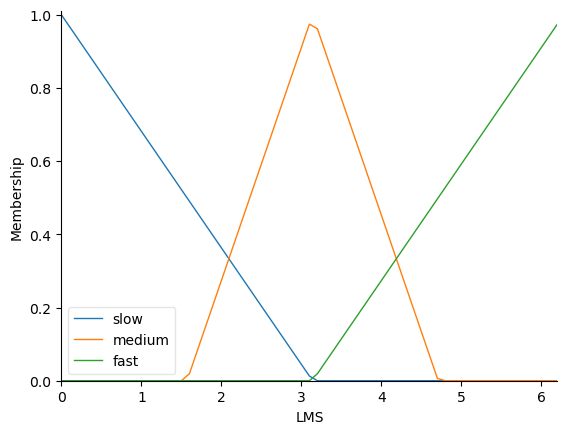

In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctl

# Input
error = ctl.Antecedent(np.arange(-160, 161, 1), 'Error')
delta_error = ctl.Antecedent(np.arange(-160, 161, 1), 'Delta Error')

# Output
rms = ctl.Consequent(np.arange(0, 6.29, 0.1), 'RMS')
lms = ctl.Consequent(np.arange(0, 6.29, 0.1), 'LMS')

# Membership functions for error
error['negative'] = fuzz.trimf(error.universe, [-160, -80, 0])
error['zero'] = fuzz.trimf(error.universe, [-80, 0, 80])
error['positive'] = fuzz.trimf(error.universe, [0, 80, 160])

# Membership functions for delta_error
delta_error['negative'] = fuzz.trimf(delta_error.universe, [-160, -80, 0])
delta_error['zero'] = fuzz.trimf(delta_error.universe, [-80, 0, 80])
delta_error['positive'] = fuzz.trimf(delta_error.universe, [0, 80, 160])

# Membership functions for motor speed
rms['slow'] = fuzz.trimf(rms.universe, [0, 0, 3.14])
rms['medium'] = fuzz.trimf(rms.universe, [1.57, 3.14, 4.71])
rms['fast'] = fuzz.trimf(rms.universe, [3.14, 6.28, 6.28])

lms['slow'] = fuzz.trimf(lms.universe, [0, 0, 3.14])
lms['medium'] = fuzz.trimf(lms.universe, [1.57, 3.14, 4.71])
lms['fast'] = fuzz.trimf(lms.universe, [3.14, 6.28, 6.28])

error.view()
delta_error.view()
rms.view()
lms.view()

RMS Output: 2.39
LMS Output: 4.29


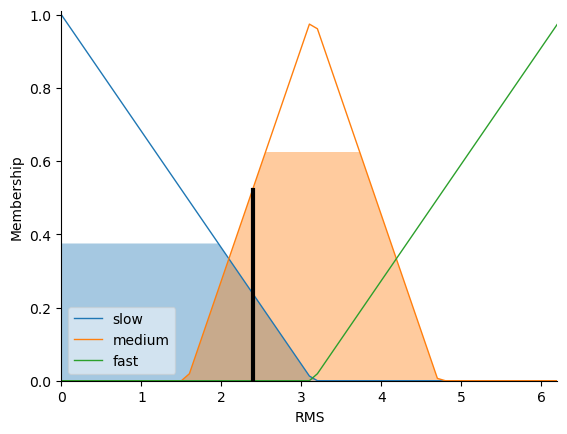

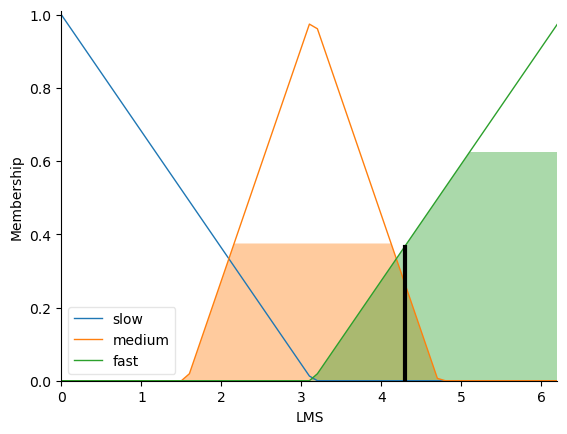

In [4]:
# Define fuzzy rules
# Define rules
rule1 = ctl.Rule(error['negative'] & delta_error['negative'], (rms['fast'], lms['slow']))
rule2 = ctl.Rule(error['negative'] & delta_error['zero'], (rms['medium'], lms['slow']))
rule3 = ctl.Rule(error['negative'] & delta_error['positive'], (rms['slow'], lms['slow']))
rule4 = ctl.Rule(error['zero'] & delta_error['negative'], (rms['fast'], lms['medium']))
rule5 = ctl.Rule(error['zero'] & delta_error['zero'], (rms['medium'], lms['medium']))
rule6 = ctl.Rule(error['zero'] & delta_error['positive'], (rms['slow'], lms['medium']))
rule7 = ctl.Rule(error['positive'] & delta_error['negative'], (rms['fast'], lms['fast']))
rule8 = ctl.Rule(error['positive'] & delta_error['zero'], (rms['medium'], lms['fast']))
rule9 = ctl.Rule(error['positive'] & delta_error['positive'], (rms['slow'], lms['fast']))

# Control system
rms_ctrl = ctl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
lms_ctrl = ctl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# Simulation
rms_sim = ctl.ControlSystemSimulation(rms_ctrl)
lms_sim = ctl.ControlSystemSimulation(lms_ctrl)

# Input values
input_error = 50
input_delta_error = 30

rms_sim.input['Error'] = input_error
rms_sim.input['Delta Error'] = input_delta_error

lms_sim.input['Error'] = input_error
lms_sim.input['Delta Error'] = input_delta_error

# Compute the outputs
rms_sim.compute()
lms_sim.compute()

print(f"RMS Output: {rms_sim.output['RMS']:.2f}")
print(f"LMS Output: {lms_sim.output['LMS']:.2f}")

# Visualize the output membership functions
rms.view(sim=rms_sim)
lms.view(sim=lms_sim)